In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [31]:
# Python
spikes = pd.DataFrame([
    {'holiday': 'spike_1', 'ds': '2022-01-09', 'lower_window': 0, 'ds_upper': '2022-06-26'},
    {'holiday': 'spike_2', 'ds': '2022-07-03', 'lower_window': 0, 'ds_upper': '2022-09-02'},
])
for t_col in ['ds', 'ds_upper']:
    spikes[t_col] = pd.to_datetime(spikes[t_col])
spikes['upper_window'] = (spikes['ds_upper'] - spikes['ds']).dt.days
spikes


,holiday,ds,lower_window,ds_upper,upper_window
0,spike_1,2022-01-09,0,2022-06-26,168
1,spike_2,2022-07-03,0,2022-09-02,61


In [32]:
df = pd.read_csv('south-korea-new-cases.csv')
df.head()

,ds,y
0,1/3/2020,0
1,1/4/2020,0
2,1/5/2020,0
3,1/6/2020,0
4,1/7/2020,0


In [33]:
m2 = Prophet(holidays=spikes)
train = df.iloc[:974] # use the first 974 rows as train set
test = df.iloc[-244:] # use the last 244 rows as test set
y_test = test['y'].values # get the actual values of y in test set
m2.fit(train)
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)

17:11:13 - cmdstanpy - INFO - Chain [1] start processing
17:11:20 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Spikes as one-off holidays')

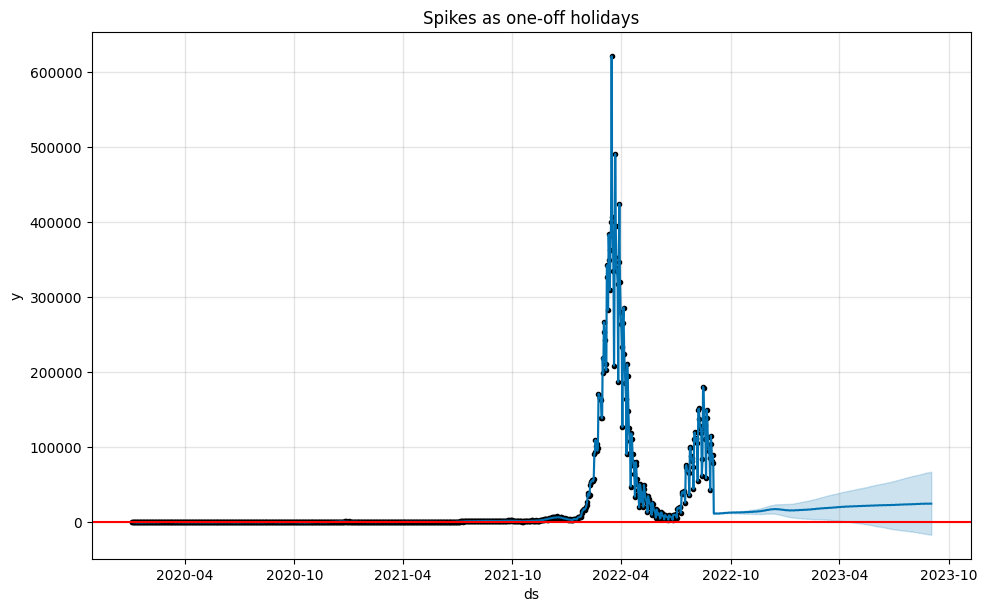

In [34]:
m2.plot(forecast2)
plt.axhline(y=0, color='red')
plt.title('Spikes as one-off holidays')

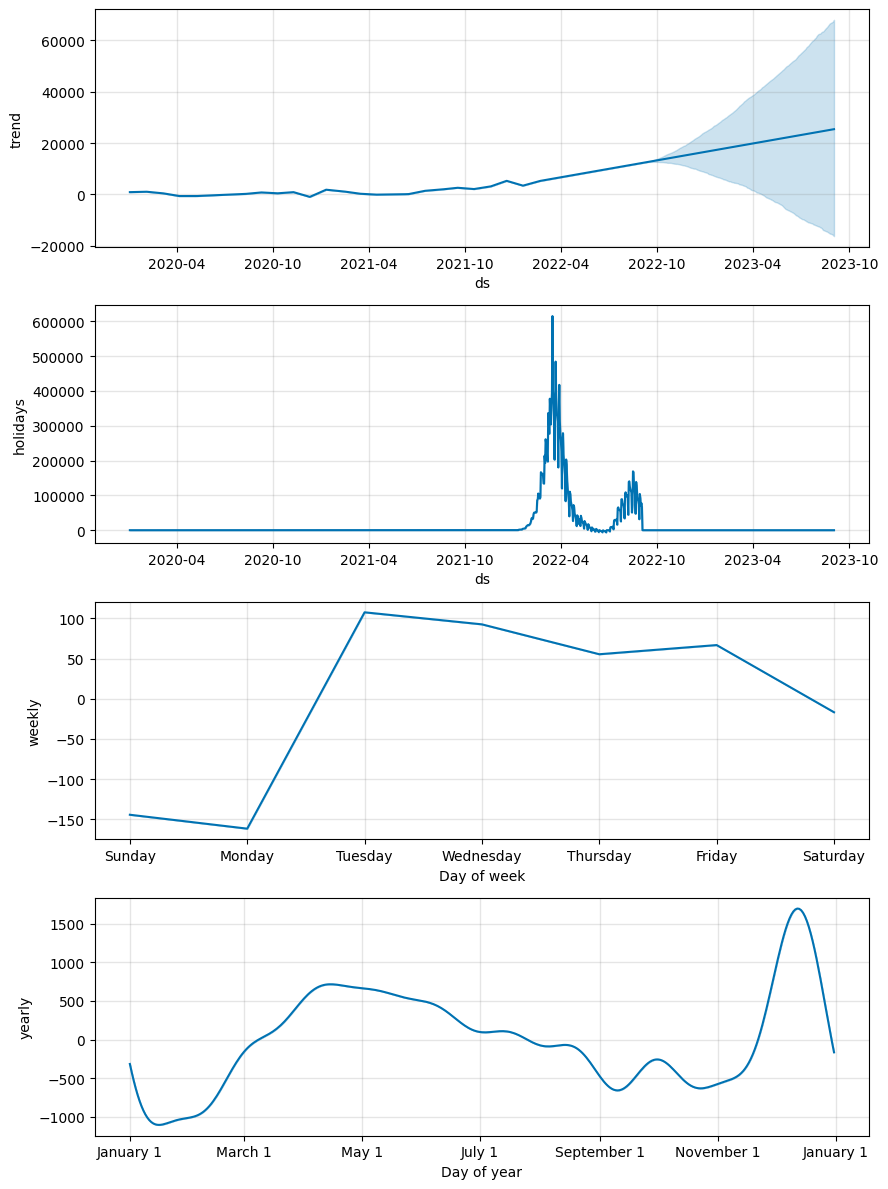

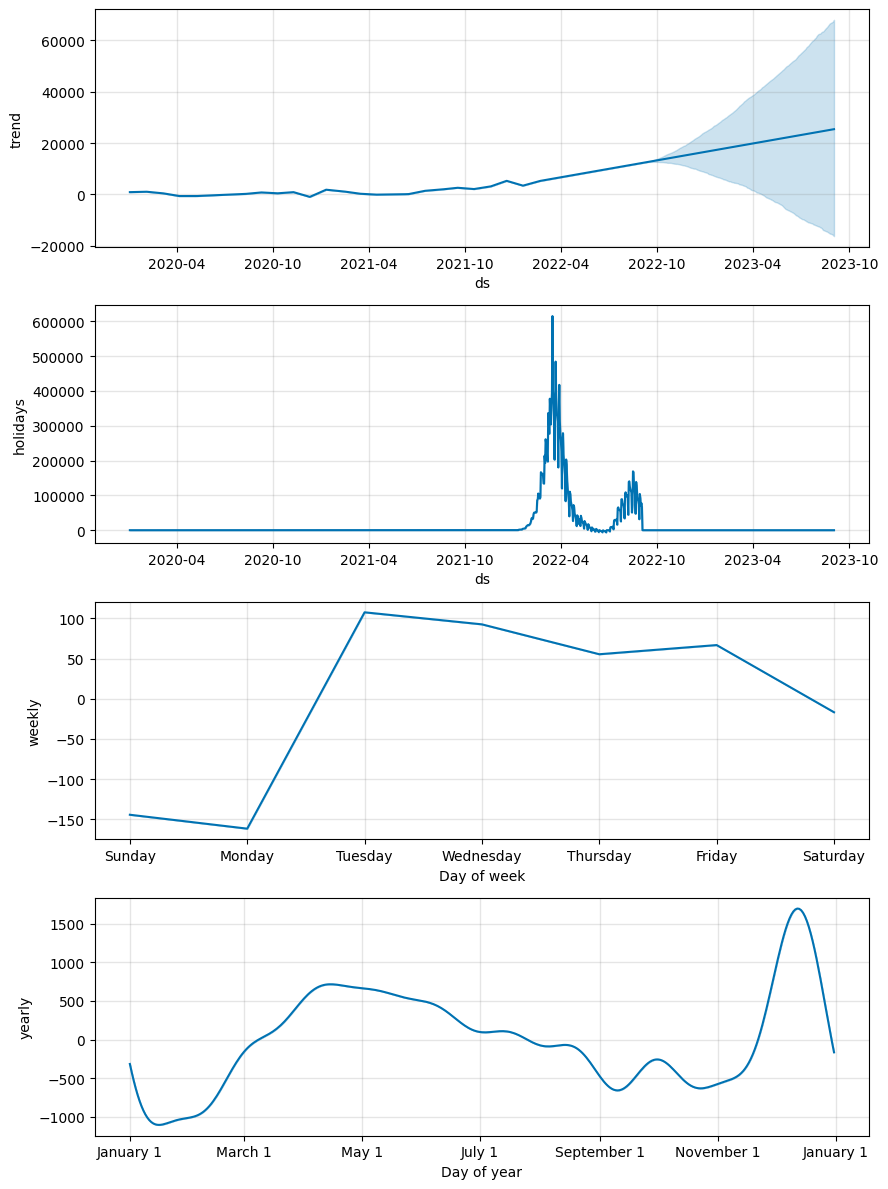

In [35]:
m2.plot_components(forecast2)

In [36]:
# get the predicted values of y in test set
y_pred = forecast2['yhat'].values[-244:]

In [37]:
# calculate the RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print(f'The RMSE value is {rmse:.2f}')

The RMSE value is 27605.32


In [38]:
# calculate the MAE
mae = mean_absolute_error(y_test, y_pred) 
print(f'The MAE value is {mae:.2f}')

The MAE value is 21492.52


In [39]:
# calculate the MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) 
print(f'The MAPE value is {mape:.2f}')

The MAPE value is 1362019137978183168.00


In [40]:
plot_plotly(m2, forecast2)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 1, 3, 0, 0),
                          datetime.datetime(2020, 1, 4, 0, 0),
                          datetime.datetime(2020, 1, 5, 0, 0), ...,
                          datetime.datetime(2022, 8, 31, 0, 0),
                          datetime.datetime(2022, 9, 1, 0, 0),
                          datetime.datetime(2022, 9, 2, 0, 0)], dtype=object),
              'y': array([    0,     0,     0, ..., 81515, 89586, 79623], dtype=int64)},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 1, 3, 0, 0),
                          datetime.datetime(2020, 1, 4, 0, 0),
                          datetime.datetime(2020, 1, 5, 0, 0), ...,
                          datetime.datetime(2023, 8, 31, 0, 0),
                          datetime.datetime(2023, 9, 1, 0, 0),
                          datetime.datetime(2023, 9, 2, 0, 0)], dtype=object),
              'y': array([   226.9073527 ,     54.22312969,   -167.52895002, ..., -16127.42384175,
                          -16540.11700328, -16569.33691489])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 1, 3, 0, 0),
                          datetime.datetime(2020, 1, 4, 0, 0),
                          datetime.datetime(2020, 1, 5, 0, 0), ...,
                          datetime.datetime(2023, 8, 31, 0, 0),
                          datetime.datetime(2023, 9, 1, 0, 0),
                          datetime.datetime(2023, 9, 2, 0, 0)], dtype=object),
              'y': array([  490.19681783,   309.8098916 ,    94.285501  , ..., 24941.23540144,
                          24952.95775291, 24870.97726382])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 1, 3, 0, 0),
                          datetime.datetime(2020, 1, 4, 0, 0),
                          datetime.datetime(2020, 1, 5, 0, 0), ...,
                          datetime.datetime(2023, 8, 31, 0, 0),
                          datetime.datetime(2023, 9, 1, 0, 0),
                          datetime.datetime(2023, 9, 2, 0, 0)], dtype=object),
              'y': array([  766.38005903,   573.22604774,   362.17588539, ..., 67208.57488414,
                          67190.36863   , 67469.54948512])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider': {

In [ ]:
plot_components_plotly(m2, forecast2)